Question 3: If a movie does well in US, does it also usually do well overseas?

In [1]:
# Load packages
install.packages('ggplot2')
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# Load movie dataset
movie<-read.csv("/Users/Xuhuiz2/Desktop/movie.csv",header=TRUE)

In [3]:
# Preparation
# Convert revenue from factor into numeric, while getting rid of the commas to avoid NA's
movie$Overseas_rev <- as.numeric(gsub(",", "", as.character(movie$Overseas_rev)))
movie$US_rev <- as.numeric(gsub(",", "", as.character(movie$US_rev)))

In [4]:
# Introduction
# Assess the correlation: 0.7107138
cor <- cor(movie$Overseas_rev,movie$US_rev,method="pearson")
cor

[1] 0.7107138

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

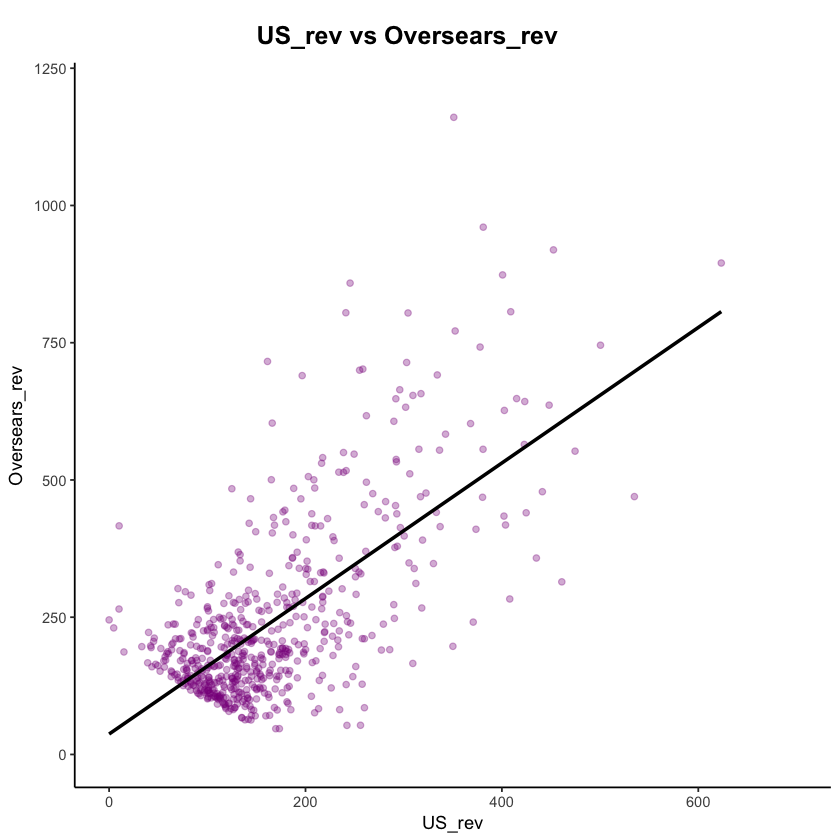

In [5]:
# Plot a scatterplot on US rev vs Overseas rev, add a trendline
ggplot(data=movie, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta') + geom_smooth(method = "lm", fill=NA,color='black',size=1) +
  xlab("US_rev") + ylab("Oversears_rev") +
  labs(title = "US_rev vs Oversears_rev") + xlim(0,700) +
  ylim(0,1200) + theme(panel.background = element_rect(fill='white'),
                       plot.title = element_text(hjust=0.4, size=15, face="bold", margin = margin(10, 0, 10, 0)),
                       axis.line = element_line(colour = "black"),
                       panel.grid.major = element_blank(),
                       panel.grid.minor = element_line(colour='white'),
                       panel.border = element_blank())

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



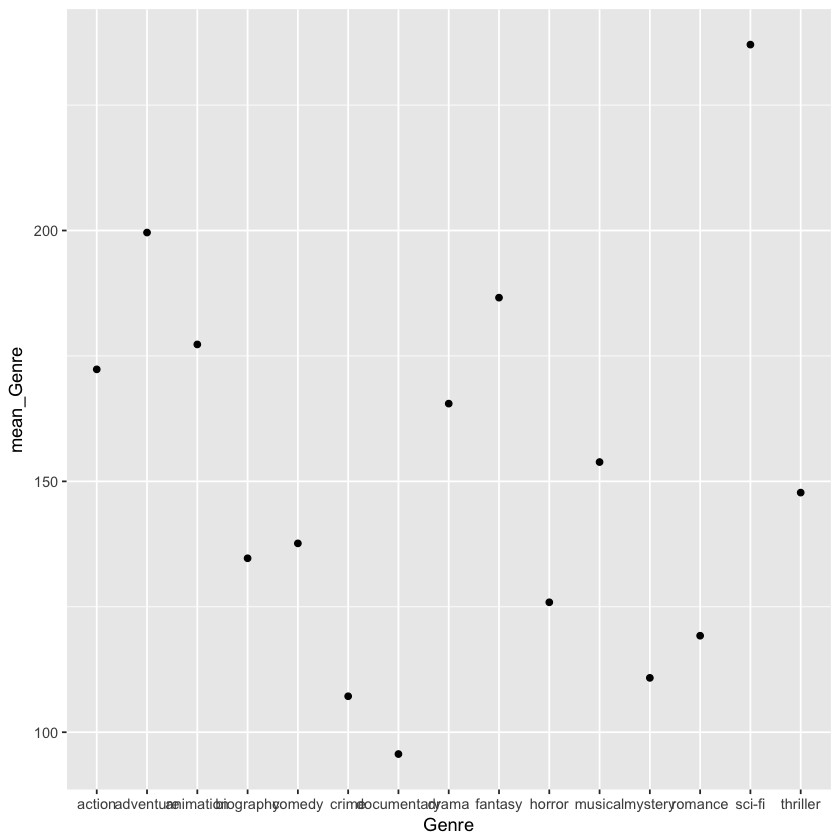

In [6]:
# Find top 5 Genre in US_rev: sci_fi, adventure, fantacy, animation, action
install.packages("dplyr")
library(dplyr)
movie$US_rev2 <- sub(",","",movie$US_rev)
data2 <- movie %>% group_by(Genre) %>% 
  summarise(mean_Genre = mean(as.numeric(US_rev2)))
ggplot(data2, aes(x = Genre, y= mean_Genre)) + geom_point()

Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

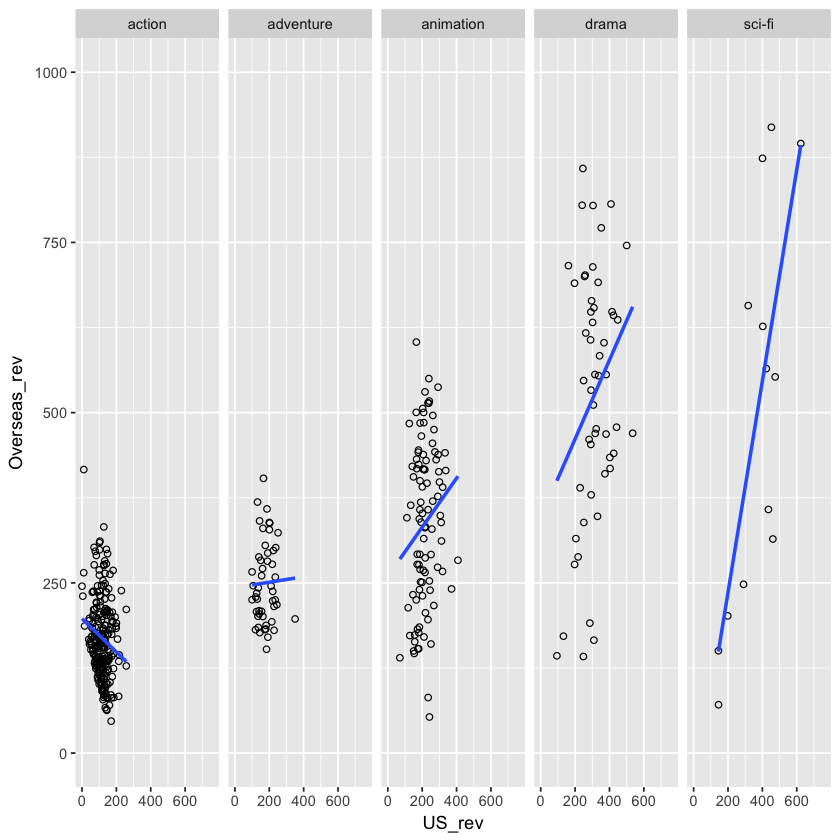

In [7]:
# Find seperate correlations between revenuews for each of top 5 genres
# Replace fantasy with drama: Due to lack of number of records of fantasy, which is not representative and drama ranks 6th.
filtergenre<-movie$Genre %in% c("sci-fi","adventure","drama","animation","action")
movie_filtergenre<-movie[filtergenre,]
movie_filtergenre$Overseas_rev <- as.numeric(gsub(",", "", as.character(movie_filtergenre$Overseas_rev)))
movie_filtergenre$US_rev <- as.numeric(gsub(",", "", as.character(movie_filtergenre$US_rev)))
ggplot(movie_filtergenre, aes(x=movie_filtergenre$US_rev, y=movie_filtergenre$Overseas_rev)) + 
  geom_point(shape=1)+ facet_grid( ~ movie_filtergenre$Genre) +ylim(0,1000) + 
  geom_smooth(method="lm",fill=NA) + xlab("US_rev") + ylab("Overseas_rev")

In [9]:
## check correlation for all 5 Genre
sci_fi <- subset(movie_filtergenre,movie_filtergenre[,3] == "sci-fi")
adventure<-subset(movie_filtergenre,movie_filtergenre[,3] == "adventure")
drama <- subset(movie_filtergenre,movie_filtergenre[,3] == "drama")
animation<-subset(movie_filtergenre,movie_filtergenre[,3] == "animation")
action<-subset(movie_filtergenre,movie_filtergenre[,3] == "action")

cor(sci_fi$US_rev,sci_fi$Overseas_rev,method="pearson")
#0.8771291
cor(adventure$US_rev,adventure$Overseas_rev,method="pearson")
#0.670974
cor(drama$US_rev,drama$Overseas_rev,method="pearson")
#0.7860048
cor(animation$US_rev,animation$Overseas_rev,method="pearson")
#0.6155465
cor(action$US_rev,action$Overseas_rev,method="pearson")
#0.7034503

[1] 0.8771291

[1] 0.670974

[1] 0.7860048

[1] 0.6155465

[1] 0.7034502

In [10]:
# Check correlation for the other 10 Genre
comedy <- subset(movie,movie[,3] == "comedy")
horror <- subset(movie,movie[,3] == "horror")
biography <- subset(movie,movie[,3] == "biography")
musical <- subset(movie,movie[,3] == "musical")
crime <- subset(movie,movie[,3] == "crime")
romance <- subset(movie,movie[,3] == "romance")
fantasy <- subset(movie,movie[,3] == "fantasy")
mystery <- subset(movie,movie[,3] == "mystery")
thriller <- subset(movie,movie[,3] == "thriller")
documentary <- subset(movie,movie[,3] == "documentary")

cor(comedy$US_rev,comedy$Overseas_rev,method="pearson") #0.0773735
cor(horror$US_rev,horror$Overseas_rev,method="pearson") #0.5840153
cor(biography$US_rev,biography$Overseas_rev,method="pearson") #-0.2977574
cor(musical$US_rev,musical$Overseas_rev,method="pearson") #1
cor(crime$US_rev,crime$Overseas_rev,method="pearson") #-0.2115625
cor(romance$US_rev,romance$Overseas_rev,method="pearson") #-0.06818881
cor(fantasy$US_rev,fantasy$Overseas_rev,method="pearson") #0.9795979
cor(mystery$US_rev,mystery$Overseas_rev,method="pearson") #0.8494952
cor(thriller$US_rev,thriller$Overseas_rev,method="pearson") #0.4393351
cor(documentary$US_rev,documentary$Overseas_rev,method="pearson") #-1

[1] 0.0773735

[1] 0.5840153

[1] -0.2977574

[1] 1

[1] -0.2115625

[1] -0.06818881

[1] 0.9795979

[1] 0.8494952

[1] 0.4393351

[1] -1

Warning message:
“Removed 11 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11 rows containing missing values (geom_point).”

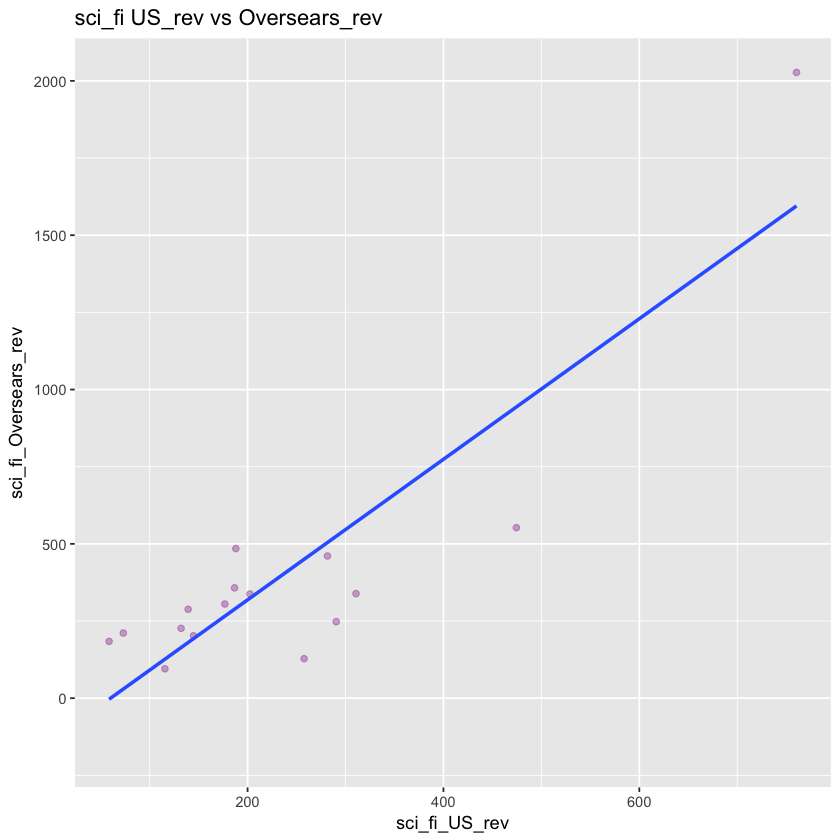

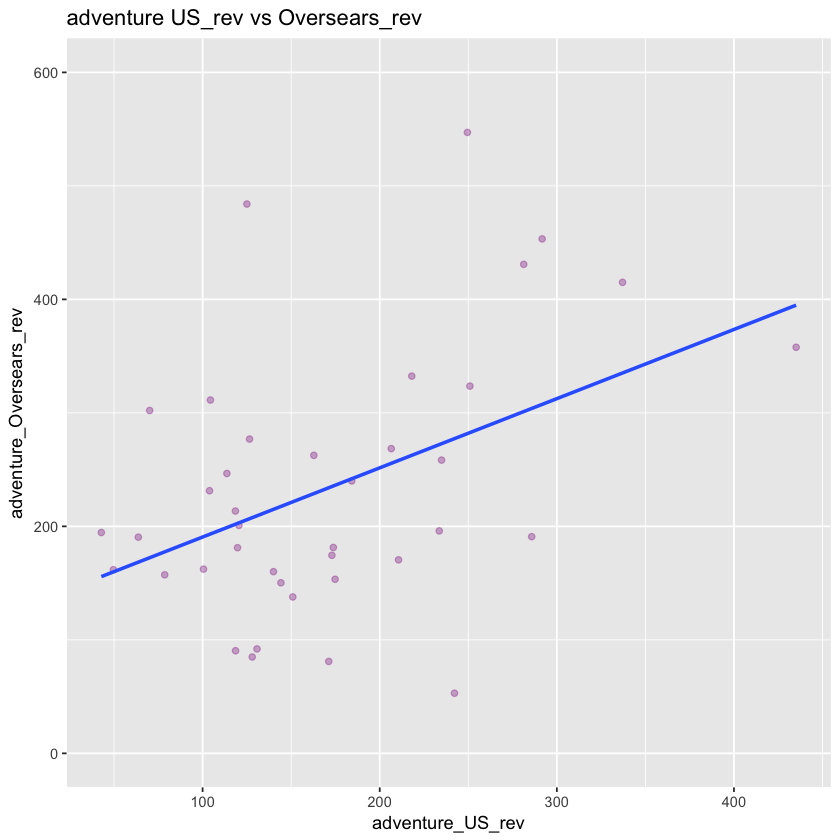

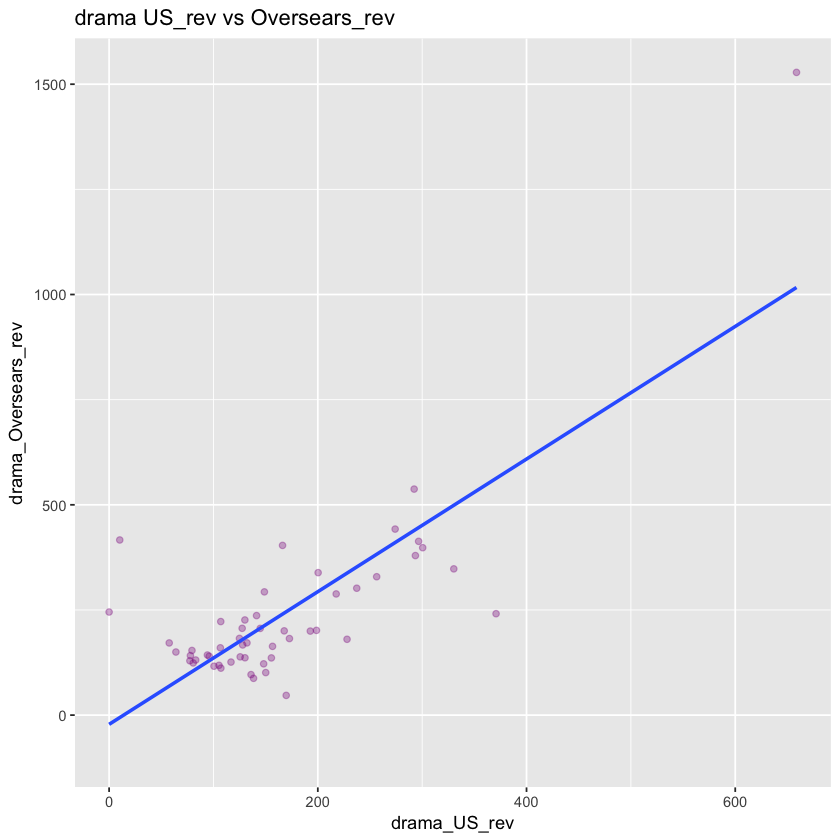

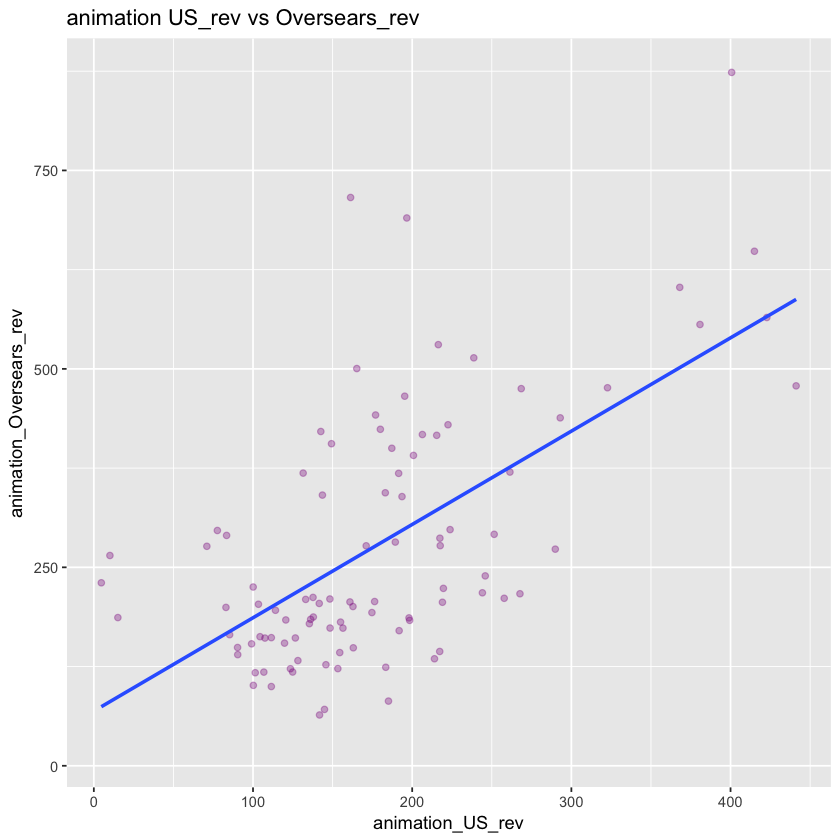

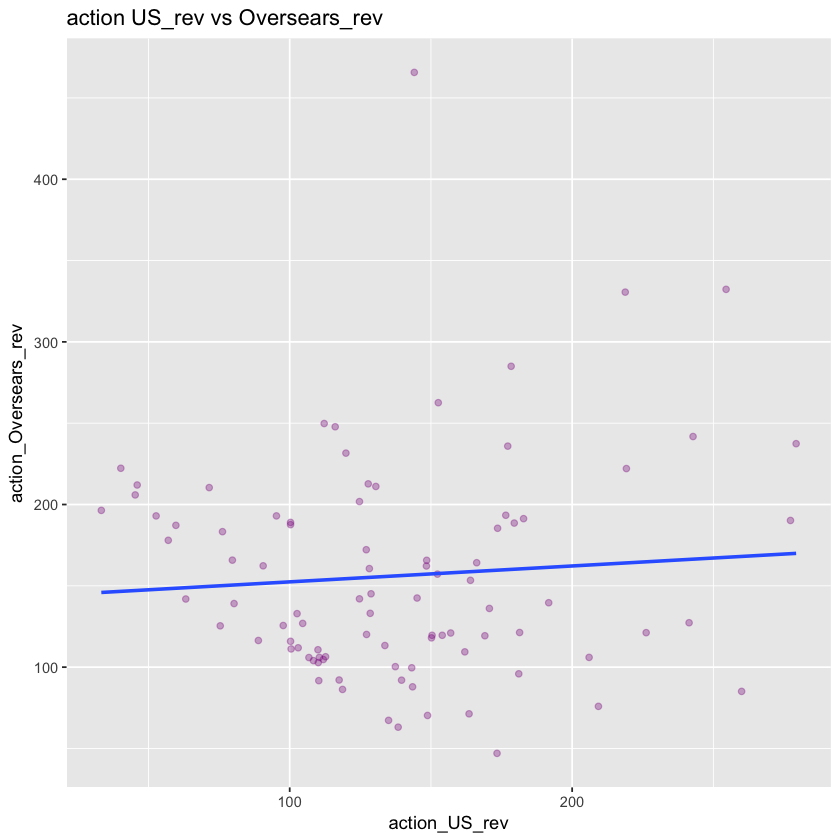

In [12]:
# Plot seperately for each of top 5 genres
# For sci-fi
ggplot(data=sci_fi, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta')+ 
  geom_smooth(method = "lm", fill=NA, size=1) + 
  xlab("sci_fi_US_rev") + ylab("sci_fi_Oversears_rev") +
  labs(title = "sci_fi US_rev vs Oversears_rev") 
# For adventure
ggplot(data=adventure, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta') + 
  geom_smooth(method = "lm", fill=NA, size=1)+
  xlab("adventure_US_rev") + ylab("adventure_Oversears_rev") +
  labs(title = "adventure US_rev vs Oversears_rev") +
  ylim(0,600)
# For drama
ggplot(data=drama, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta')+
  geom_smooth(method = "lm", fill=NA,size=1) + 
  xlab("drama_US_rev") + ylab("drama_Oversears_rev") +
  labs(title = "drama US_rev vs Oversears_rev")
# For animation
ggplot(data=animation, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta') +
  geom_smooth(method = "lm", fill=NA,size=1) + 
  xlab("animation_US_rev") + ylab("animation_Oversears_rev") +
  labs(title = "animation US_rev vs Oversears_rev")
# For action
ggplot(data=comedy, aes(x=US_rev, y=Overseas_rev)) + 
  geom_point(alpha=1/3,color='dark magenta') + 
  geom_smooth(method = "lm", fill=NA,size=1) + 
  xlab("action_US_rev") + ylab("action_Oversears_rev") +
  labs(title = "action US_rev vs Oversears_rev")
